In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Обработка данных

In [77]:
data = pd.read_csv('SpotifyFeatures.csv')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Для начала поработаю с числовыми признаками, потом уже в зависимости от метрики решу, нужно ли здесь что-то большее.

In [79]:
numeric = data.columns[data.dtypes != 'object']
numeric

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

Судя по всему, popularity - целевая переменная, поэтому удалю ее из списка.

In [80]:
data = data.assign(popularity_class = data['popularity'] // 26)

In [81]:
numeric = numeric.drop('popularity')

In [82]:
X = data[numeric]
y = data['popularity']

# Построение модели

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [9]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
179321,0.0944,0.4490,226653,0.7810,0.681000,0.5030,-12.849,0.0823,119.166,0.9330
218707,0.8620,0.2170,498000,0.2300,0.898000,0.7250,-12.791,0.0324,149.760,0.0742
56524,0.3750,0.6380,251228,0.3450,0.000000,0.1160,-9.048,0.0744,85.455,0.3110
127427,0.9750,0.2450,273067,0.0675,0.000222,0.1070,-19.141,0.0473,61.730,0.0506
225063,0.2010,0.5850,221800,0.6430,0.000306,0.1440,-8.392,0.0395,152.980,0.5920
...,...,...,...,...,...,...,...,...,...,...
176963,0.9550,0.4920,239267,0.1330,0.650000,0.3940,-14.821,0.0548,124.087,0.4260
117952,0.0344,0.8380,185707,0.4120,0.000234,0.1590,-7.148,0.2890,75.044,0.1660
173685,0.8200,0.5840,103320,0.3710,0.000000,0.2650,-18.916,0.9380,87.051,0.5790
43567,0.0869,0.6910,316307,0.5670,0.150000,0.0276,-11.624,0.0515,116.705,0.9420


In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

# Исследование модели

In [11]:
from sklearn.metrics import mean_absolute_error

pred = model.predict(X_test).astype('int')
mean_absolute_error(y_test, pred)

8.078975637004254

In [12]:
importances = model.feature_importances_
indices = np.arange(importances.size)
names = X.columns

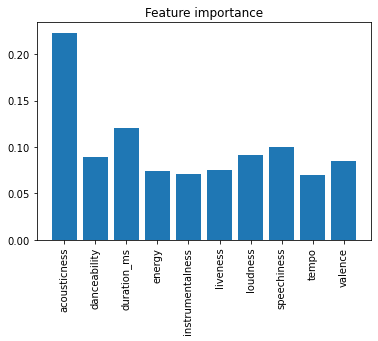

In [13]:
plt.figure()
plt.title('Feature importance')
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)
plt.show()

# Обработка категориальных признаков

**genre** - жанр песни - поддается обработке, потенциально высокая связь с популярностью

**artist_name** - имя артиста - слишком много уникальных значений, вряд ли влияет на популярность

**track_name** - название трека - слишком много уникальных значений, вряд ли влияет на популярность

**track_id** - уникальный идентификатор трека - слишком много уникальных значений, никак не связано с популярностью

**key** - аккорд - поддается обработке, связь с популярностью неочевидна

**mode** - тональность - поддается обработке, связь с популярностью должна отсутствовать

**time_signature** - размерность - поддается обработке, можно исследовать связь с популярностью

In [50]:
X = X.join(pd.get_dummies(data[['genre', 'key']]))

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [52]:
model_w_cat = RandomForestRegressor(random_state=0, n_jobs=-1)
model_w_cat.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [53]:
mean_absolute_error(y_test, model_w_cat.predict(X_test).astype('int'))

6.999613285781807